---
### Objetivo:

Uma analise comparativa de pandas X spark (de preferencia no databricks)

### O que fazer:

Pegar 2 datasets um > 50mb e outro menor

Realizar pre-processamento de dados e analise exploratoria dos dados, usando pandas e pyspark

Identificar quando o panda ou pyspark é melhor

### Datasets escolhidos:

https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data

Dataset público com informações sobre série e filmes disponiveis na plataforma de streaming Netflix de 2008 a 2021.

Tamanho do dataset = **3.4 mb**


https://www.kaggle.com/datasets/peacehegemony/history-of-music-bnb

Dataset com metadata sobre o catalogo de músicas na livraria britânica em http://explore.bl.uk

Tamanho do dataset = **261 mb**

---

In [1]:
# Importando as bibliotecas que serão utilizadas
import time # para registrar o tempo de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import *

---
### Trabalhando com o Dataset menor usando PANDAS
---

In [2]:
inicio_pandas_netflix = time.time()

In [3]:
# Leitura do arquivo csv

netflix = pd.read_csv('netflix_titles_2021.csv')
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
#verificando o tamanho do dataset

netflix.shape

(8807, 12)

In [5]:
# Alterando os nomes das colunas

colunas = {'type':'tipo', 'title':'titulo', 'director':'diretor', 'cast':'elenco',
            'country':'pais', 'date_added':'adicionado_em','release_year':'ano_lancamento',
            'rating':'avaliacao', 'duration':'duracao', 'listed_in':'categorias', 'description':'descricao'}

netflix.rename(columns=colunas, inplace=True)

In [6]:
netflix.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Contagem percentual de valores nulos no dataframe

frequencia = netflix.isna().sum() 
percentual_na = round((netflix.isna().sum() / len(netflix))*100, 2)
valores_na = pd.DataFrame([frequencia, percentual_na]).transpose().rename(columns={0:'Frequência', 1:'% de NAs'})
valores_na

,Frequência,% de NAs
show_id,0.0,0.00
tipo,0.0,0.00
titulo,0.0,0.00
diretor,2634.0,29.91
elenco,825.0,9.37
pais,831.0,9.44
adicionado_em,10.0,0.11
ano_lancamento,0.0,0.00
avaliacao,4.0,0.05
duracao,3.0,0.03


In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8807 non-null   object
 1   tipo            8807 non-null   object
 2   titulo          8807 non-null   object
 3   diretor         6173 non-null   object
 4   elenco          7982 non-null   object
 5   pais            7976 non-null   object
 6   adicionado_em   8797 non-null   object
 7   ano_lancamento  8807 non-null   int64 
 8   avaliacao       8803 non-null   object
 9   duracao         8804 non-null   object
 10  categorias      8807 non-null   object
 11  descricao       8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Otimizando o tamanho da variável ano_lancamento

netflix['ano_lancamento'] = netflix["ano_lancamento"].astype('int16')

In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8807 non-null   object
 1   tipo            8807 non-null   object
 2   titulo          8807 non-null   object
 3   diretor         6173 non-null   object
 4   elenco          7982 non-null   object
 5   pais            7976 non-null   object
 6   adicionado_em   8797 non-null   object
 7   ano_lancamento  8807 non-null   int16 
 8   avaliacao       8803 non-null   object
 9   duracao         8804 non-null   object
 10  categorias      8807 non-null   object
 11  descricao       8807 non-null   object
dtypes: int16(1), object(11)
memory usage: 774.2+ KB


In [11]:
# Cria um dicionário com os valores dos meses

import calendar

meses = dict((month, str(index)) for index, month in enumerate(calendar.month_name) if month)
meses

{'January': '1',
 'February': '2',
 'March': '3',
 'April': '4',
 'May': '5',
 'June': '6',
 'July': '7',
 'August': '8',
 'September': '9',
 'October': '10',
 'November': '11',
 'December': '12'}

In [12]:
# modificando o texto para achar um padrão para o split 
netflix['adicionado_em'] = netflix.adicionado_em.str.strip()
netflix['adicionado_em'] = netflix['adicionado_em'].str.replace(', ', '/')
netflix['adicionado_em'] = netflix['adicionado_em'].str.replace(' ', '/')

In [13]:
# separação do valor adicionado_em em dia, mês e ano

data = netflix['adicionado_em'].str.split('/', n = 2, expand = True)
mes = data[0]
dia = data[1]
ano = data[2]

In [14]:
# substituição dos nomes dos meses por seus respectivos valores

mes.replace(meses, inplace=True)

In [15]:
# novo dataframe pandas para inclusão da coluna de data

data = pd.DataFrame([dia, mes, ano]).transpose().rename(columns={1:'dia', 0:'mes', 2:'ano'})
data.dia = data.dia.str.zfill(2)
data.mes = data.mes.str.zfill(2)
data['data'] = data.dia + '/' + data.mes + '/' + data.ano

In [16]:
# remoção das colunas dia, mes e ano
data.drop(columns=['dia', 'mes', 'ano'], inplace=True)

In [17]:
# modifica a coluna adicionado_em para valores com datas no formato dd/mm/yyyy.
netflix['adicionado_em'] = data
netflix.head(5)

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25/09/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24/09/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24/09/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
netflix['adicionado_em'] = netflix['adicionado_em'].astype('datetime64[ns]')

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_2800\3237889366.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  netflix['adicionado_em'] = netflix['adicionado_em'].astype('datetime64[ns]')


In [19]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   tipo            8807 non-null   object        
 2   titulo          8807 non-null   object        
 3   diretor         6173 non-null   object        
 4   elenco          7982 non-null   object        
 5   pais            7976 non-null   object        
 6   adicionado_em   8797 non-null   datetime64[ns]
 7   ano_lancamento  8807 non-null   int16         
 8   avaliacao       8803 non-null   object        
 9   duracao         8804 non-null   object        
 10  categorias      8807 non-null   object        
 11  descricao       8807 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 774.2+ KB


In [20]:
# Agrupando os valores por categorias

categorias = netflix['categorias'].value_counts()
categorias

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: categorias, Length: 514, dtype: int64

In [21]:
# Top 3 categorias

top_3_categorias = categorias.head(3)
top_3_categorias


Dramas, International Movies    362
Documentaries                   359
Stand-Up Comedy                 334
Name: categorias, dtype: int64

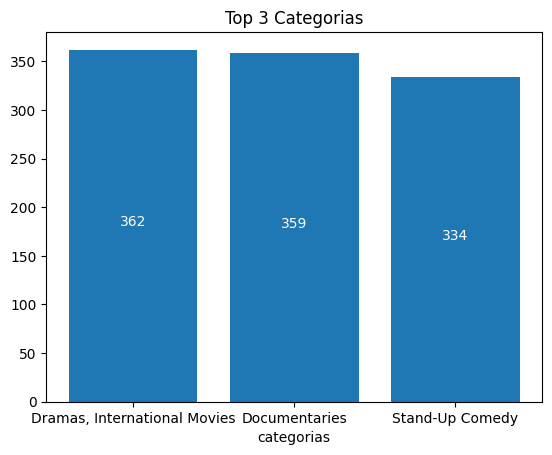

In [22]:
# função para add valores nas barras 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white')


plt.bar(x=top_3_categorias.index, height=top_3_categorias)
plt.xlabel('categorias')
plt.title('Top 3 Categorias')
addlabels(x=top_3_categorias.index, y=top_3_categorias)
plt.show()

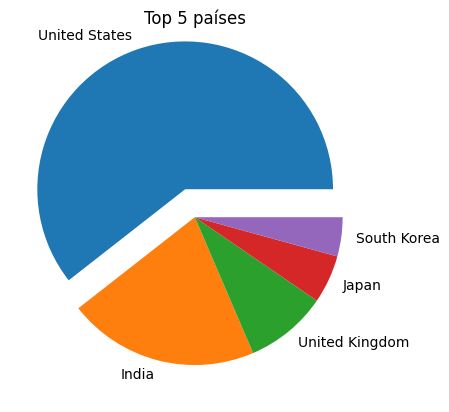

In [23]:
# Top 5 Países
paises = netflix.pais.value_counts().head(5)
paises
label = paises.index
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(paises, labels=label, explode=myexplode)
plt.title('Top 5 países')
plt.show()

In [24]:
# retornado os valores nulos do dataset

netflix_transformado = netflix.dropna()
netflix_transformado.head(5)

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [25]:
netflix_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5332 non-null   object        
 1   tipo            5332 non-null   object        
 2   titulo          5332 non-null   object        
 3   diretor         5332 non-null   object        
 4   elenco          5332 non-null   object        
 5   pais            5332 non-null   object        
 6   adicionado_em   5332 non-null   datetime64[ns]
 7   ano_lancamento  5332 non-null   int16         
 8   avaliacao       5332 non-null   object        
 9   duracao         5332 non-null   object        
 10  categorias      5332 non-null   object        
 11  descricao       5332 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 510.3+ KB


In [26]:
# separando o dataset por duração (Season)

selecao = netflix_transformado.duracao.str.contains('Season')
season = netflix_transformado[selecao]
season.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021-08-27,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021-08-13,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,2021-08-13,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-06-08,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [27]:
season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 8 to 8599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         147 non-null    object        
 1   tipo            147 non-null    object        
 2   titulo          147 non-null    object        
 3   diretor         147 non-null    object        
 4   elenco          147 non-null    object        
 5   pais            147 non-null    object        
 6   adicionado_em   147 non-null    datetime64[ns]
 7   ano_lancamento  147 non-null    int16         
 8   avaliacao       147 non-null    object        
 9   duracao         147 non-null    object        
 10  categorias      147 non-null    object        
 11  descricao       147 non-null    object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 14.1+ KB


In [28]:
# separando o dataset por duração (Minutos)

selecao = netflix_transformado.duracao.str.contains('min')
filmes_minutos = netflix_transformado[selecao]
filmes_minutos.reset_index(inplace=True, drop=True)
filmes_minutos.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [29]:
filmes_minutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5185 non-null   object        
 1   tipo            5185 non-null   object        
 2   titulo          5185 non-null   object        
 3   diretor         5185 non-null   object        
 4   elenco          5185 non-null   object        
 5   pais            5185 non-null   object        
 6   adicionado_em   5185 non-null   datetime64[ns]
 7   ano_lancamento  5185 non-null   int16         
 8   avaliacao       5185 non-null   object        
 9   duracao         5185 non-null   object        
 10  categorias      5185 non-null   object        
 11  descricao       5185 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 455.8+ KB


In [30]:
# tranformando o valor da duração em minutos (str) para int
filmes_minutos['duracao'] = filmes_minutos.loc[:, 'duracao'].str.replace(' min', '')
filmes_minutos.head(5)

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_2800\1706945141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_minutos['duracao'] = filmes_minutos.loc[:, 'duracao'].str.replace(' min', '')


,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...


In [31]:
filmes_minutos.duracao = filmes_minutos.loc[:, 'duracao'].astype('int16')

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_2800\3179336111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_minutos.duracao = filmes_minutos.loc[:, 'duracao'].astype('int16')


In [32]:
filmes_minutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5185 non-null   object        
 1   tipo            5185 non-null   object        
 2   titulo          5185 non-null   object        
 3   diretor         5185 non-null   object        
 4   elenco          5185 non-null   object        
 5   pais            5185 non-null   object        
 6   adicionado_em   5185 non-null   datetime64[ns]
 7   ano_lancamento  5185 non-null   int16         
 8   avaliacao       5185 non-null   object        
 9   duracao         5185 non-null   int16         
 10  categorias      5185 non-null   object        
 11  descricao       5185 non-null   object        
dtypes: datetime64[ns](1), int16(2), object(9)
memory usage: 425.5+ KB


In [33]:
# Média de duração dos filmes (min)

media_duracao = round(filmes_minutos.duracao.mean(), 2)
media_duracao

102.7

In [34]:
# Verificando as estatísticas básicas do dataset filmes_minutos

filmes_minutos.duracao.describe()

count    5185.000000
mean      102.701446
std        25.962914
min         8.000000
25%        89.000000
50%       101.000000
75%       117.000000
max       253.000000
Name: duracao, dtype: float64

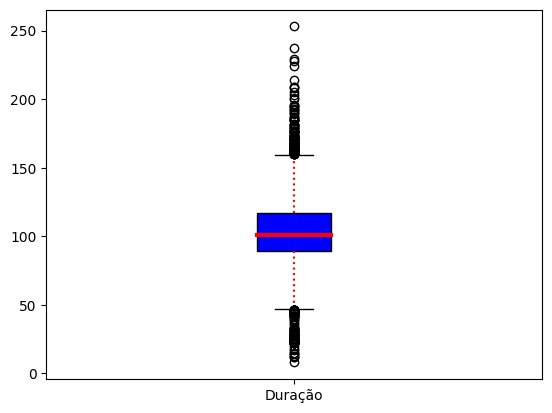

In [35]:
# boxplot - verificando outliers

bp = plt.boxplot(x='duracao', data=filmes_minutos, vert=1, patch_artist=True, labels=['Duração'])
colors = 'blue'
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")
plt.show()

In [36]:
fim_pandas_netflix = time.time()

---
### Trabalhando com o Dataset menor usando SPARK
---

In [37]:
inicio_spark_netflix = time.time()

In [38]:
## iniciando o spark

spark = SparkSession.builder.appName("Netflix Data").getOrCreate()


In [39]:
#lendo o arquivo .csv

netflix = spark.read.csv("netflix_titles_2021.csv", header=True, inferSchema=True)

netflix.show(10)

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [40]:
#verificando o tamanho do dataset

print((netflix.count(),len(netflix.columns)))

(8809, 12)


In [41]:
colunas = {'type':'tipo', 'title':'titulo', 'director':'diretor', 'cast':'elenco',
            'country':'pais', 'date_added':'adicionado_em','release_year':'ano_lancamento',
            'rating':'avaliacao', 'duration':'duracao', 'listed_in':'categorias', 'description':'descricao'}

In [42]:
for old_name, new_name in colunas.items():
  netflix = netflix.withColumnRenamed(old_name, new_name)

In [43]:
netflix.show(10)

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+---------+---------+--------------------+--------------------+
|show_id|   tipo|              titulo|             diretor|              elenco|                pais|     adicionado_em|ano_lancamento|avaliacao|  duracao|          categorias|           descricao|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+---------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|          2020|    PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|          2021|    TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|T

In [44]:
# Verificando os valores ausentes
from pyspark.sql import functions as f

frequencia = netflix.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in netflix.columns])
percentual_na = netflix.select([(f.count(f.when(f.isnull(c), 1))/netflix.count() *100).alias(c) for c in netflix.columns])
percentual_na = percentual_na.select([f.round(c,2).alias(c) for c in percentual_na.columns])
valores_ausentes = frequencia.unionAll(percentual_na)
valores_ausentes.show()

+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+
|show_id|tipo|titulo|diretor|elenco| pais|adicionado_em|ano_lancamento|avaliacao|duracao|categorias|descricao|
+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+
|    0.0| 1.0|   2.0| 2636.0| 826.0|832.0|         13.0|           2.0|      6.0|    5.0|       3.0|      3.0|
|    0.0|0.01|  0.02|  29.92|  9.38| 9.44|         0.15|          0.02|     0.07|   0.06|      0.03|     0.03|
+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+



In [45]:
valores_ausentes.toPandas().transpose().rename(columns={0:'Frequência', 1:'% de NAs'})

,Frequência,% de NAs
show_id,0.0,0.00
tipo,1.0,0.01
titulo,2.0,0.02
diretor,2636.0,29.92
elenco,826.0,9.38
pais,832.0,9.44
adicionado_em,13.0,0.15
ano_lancamento,2.0,0.02
avaliacao,6.0,0.07
duracao,5.0,0.06


In [46]:
# verificando os tipos de dados do df
netflix.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- titulo: string (nullable = true)
 |-- diretor: string (nullable = true)
 |-- elenco: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- adicionado_em: string (nullable = true)
 |-- ano_lancamento: string (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- duracao: string (nullable = true)
 |-- categorias: string (nullable = true)
 |-- descricao: string (nullable = true)



In [47]:
# Otimizando o tamanho da variável ano_lancamento

from pyspark.sql.types import IntegerType, StringType

netflix = netflix.withColumn('ano_lancamento', netflix['ano_lancamento'].cast(IntegerType()))

In [48]:
netflix.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- titulo: string (nullable = true)
 |-- diretor: string (nullable = true)
 |-- elenco: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- adicionado_em: string (nullable = true)
 |-- ano_lancamento: integer (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- duracao: string (nullable = true)
 |-- categorias: string (nullable = true)
 |-- descricao: string (nullable = true)



In [49]:
# adicionando as colunas mes, dia e ano

netflix = netflix.withColumn('mes', f.split(netflix['adicionado_em'], ' ').getItem(0))
netflix = netflix.withColumn('dia', f.split(netflix['adicionado_em'], ' ').getItem(1))
netflix = netflix.withColumn('dia', f.regexp_replace('dia', ',', ''))
netflix = netflix.withColumn('ano', f.split(netflix['adicionado_em'], ' ').getItem(2))

In [50]:
# Cria um dicionário com os valores dos meses

import calendar

meses = dict((month, str(index)) for index, month in enumerate(calendar.month_name) if month)
meses

{'January': '1',
 'February': '2',
 'March': '3',
 'April': '4',
 'May': '5',
 'June': '6',
 'July': '7',
 'August': '8',
 'September': '9',
 'October': '10',
 'November': '11',
 'December': '12'}

In [51]:
# função para recuperar os valores dos meses

map_func = f.udf(lambda row : meses.get(row, row))
netflix = netflix.withColumn('mes', map_func(f.col('mes')))

In [52]:
# preenche com 0 as colunas de dia e mes que tem valores < 10

netflix = netflix.withColumn('mes', f.lpad(netflix.mes,2, '0'))
netflix = netflix.withColumn("mes", f.concat(f.lit("-"), f.col("mes"), f.lit("-")))
netflix = netflix.withColumn('dia', f.lpad(netflix.dia,2, '0'))

In [53]:
# concatenando as colunas ano-mes-dia
netflix = netflix.withColumn('data', f.concat(netflix.ano, netflix.mes, netflix.dia))

In [54]:
# retirando colunas desnecessárias

cols = ("adicionado_em","mes","dia", "ano")

netflix = netflix.drop(*cols)

In [55]:
# mudando o nome da coluna data para adicionado_em
netflix = netflix.withColumnRenamed('data', 'adicionado_em')

In [56]:
# mudando o tipo da variável adicionado_em de str para date

netflix = netflix.withColumn('adicionado_em', f.to_date(netflix.adicionado_em))

In [57]:
# Agrupando os valores por categorias

categorias = netflix.groupBy('categorias').agg(f.count("*").alias("total")).sort(f.desc('total'))                
categorias.show(5)

+--------------------+-----+
|          categorias|total|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
|Comedies, Dramas,...|  273|
|Dramas, Independe...|  252|
+--------------------+-----+
only showing top 5 rows



In [58]:
# Top 3 categorias

top_3_categorias = categorias.limit(3)
top_3_categorias.show()

+--------------------+-----+
|          categorias|total|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
+--------------------+-----+



In [59]:
#from traitlets.config.application import T
top_3_categorias = top_3_categorias.toPandas()
top_3_categorias

,categorias,total
0,"Dramas, International Movies",361
1,Documentaries,358
2,Stand-Up Comedy,334


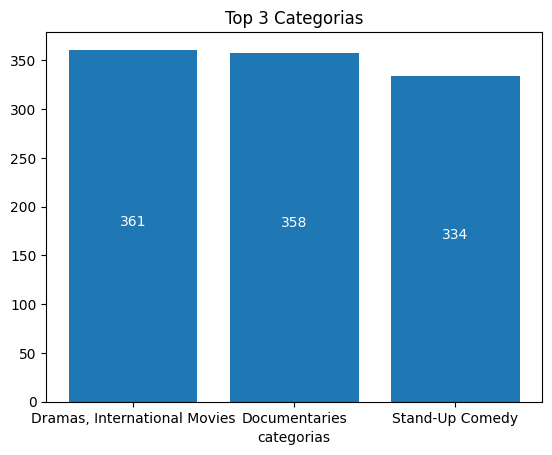

In [60]:
import matplotlib.pyplot as plt

# função para add valores nas barras 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white')

plt.bar(x=top_3_categorias.categorias, height=top_3_categorias.total)
plt.xlabel('categorias')
plt.title('Top 3 Categorias')
addlabels(x=top_3_categorias.categorias, y=top_3_categorias.total)
plt.show()

In [61]:
# Top 5 Países
paises = netflix.filter('pais IS NOT NULL')
paises = paises.groupBy('pais').agg(f.count('*').alias('total')).sort(f.desc('total'))
top_paises = paises.limit(5)
top_paises.show()
top_paises = top_paises.toPandas()
top_paises

+--------------+-----+
|          pais|total|
+--------------+-----+
| United States| 2805|
|         India|  972|
|United Kingdom|  419|
|         Japan|  245|
|   South Korea|  199|
+--------------+-----+



,pais,total
0,United States,2805
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


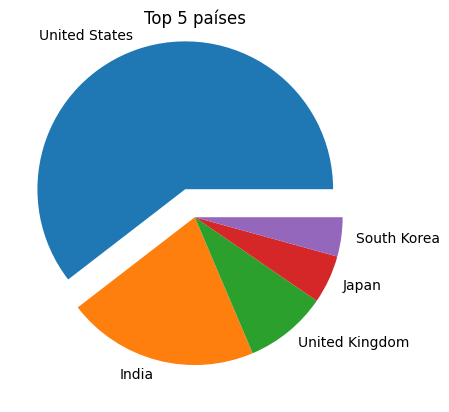

In [62]:
# plotando o gráfico de pizza

label = top_paises.pais
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(top_paises.total, labels=label, explode=myexplode)
plt.title('Top 5 países')
plt.show()

In [63]:
# retirando os valores nulos do dataset

netflix_transformado = netflix.na.drop()
netflix_transformado.show(5)

Py4JJavaError: An error occurred while calling o355.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 64.0 failed 1 times, most recent failure: Lost task 0.0 in stage 64.0 (TID 46) (DESKTOP-8G6K0Q3.localdomain executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:189)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:176)
	... 33 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:506)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:459)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:48)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3868)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2863)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2863)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3084)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:288)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:327)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:189)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:176)
	... 33 more


In [ ]:
netflix_transformado.count()

In [ ]:
from operator import contains
from numpy.lib.function_base import select
# separando o dataset por duração (Season)

season = netflix_transformado.filter(netflix_transformado.duracao.like('%Season%'))

season.show(5)
season.count()

In [ ]:
# separando o dataset por duração (Minutos)

filmes_minutos = netflix_transformado.filter(netflix_transformado.duracao.contains('min'))
filmes_minutos.show(5)

In [ ]:
# tranformando o valor da duração em minutos (str) para int
filmes_minutos = filmes_minutos.withColumn('duracao', f.regexp_replace('duracao', ' min', ''))
filmes_minutos.show(5)

In [ ]:
filmes_minutos = filmes_minutos.withColumn('duracao', filmes_minutos['duracao'].cast(IntegerType()))
filmes_minutos.printSchema()

In [ ]:
from numpy.core.fromnumeric import mean
# Média de duração dos filmes (min)

media_duracao = filmes_minutos.select(f.mean(filmes_minutos.duracao).alias('media'))
media_duracao = media_duracao.select(f.round('media', 2))
media_duracao.show()

In [ ]:
# Verificando as estatísticas básicas do dataset filmes_minutos

filmes_minutos.select("duracao").summary().show()

In [ ]:
# boxplot - verificando outliers

filmes_minutos_plot = filmes_minutos.toPandas()

bp = plt.boxplot(x='duracao', data=filmes_minutos_plot, vert=1, patch_artist=True, labels=['Duração'])
colors = 'blue'
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")
plt.show()

In [ ]:
fim_spark_netflix = time.time()

---
### Trabalhando com o Dataset maior usando PANDAS
---

In [ ]:
inicio_pandas_musica = time.time()

In [ ]:
# Leitura do arquivo csv

musicas = pd.read_csv('2detailedrecords.csv', engine='python', on_bad_lines='skip')
musicas.head(10)

In [ ]:
#verificando o tamanho do dataset

musicas.shape

In [ ]:
# Alterando os nomes das colunas

colunas = {'BL record ID':'ID da gravação', 'Composer':'Compositor', 'Composer life dates':'Datas de vida do compositor', 'Title':'Titulo',
            'Standardised title':'Titulo padronizado', 'Other titles':'Outros titulos','Other names':'Outros nomes',
            'Publication date (standardised)':'Data de publicação (padronizada)', 'Publication date (not standardised)':'Data de publicação (não padronizada)',
             'Country of publication':'País de publicação', 'Place of publication':'Local de publicação', 'Publisher':'Editora','Notes':'Notas',
             'Contents':'Conteudos extras','Referenced in':'Referencias' ,'Subject/genre terms':'Genero','Physical description':'Descrição física',
             'Series title':'Titulo da série','Number within series':'Número dentro da série',
             'Publisher number':'Número da editora','BL shelfmark':'Marca de Prateleira'
            }

musicas.rename(columns=colunas, inplace=True)

In [ ]:
musicas.head()

In [ ]:
# Contagem percentual de valores nulos no dataframe

frequencia = musicas.isna().sum() 
percentual_na = round((musicas.isna().sum() / len(musicas))*100, 2)
valores_na = pd.DataFrame([frequencia, percentual_na]).transpose().rename(columns={0:'Frequência', 1:'% de NAs'})
valores_na

In [ ]:
musicas.info()

In [ ]:
# Otimizando o tamanho da do dataframe

musicas['ID da gravação'] = musicas["ID da gravação"].astype('Int32')
musicas['Data de publicação (padronizada)'] = musicas["Data de publicação (padronizada)"].astype('Int16')

In [ ]:
musicas.info()

In [ ]:
# Agrupando os valores por país de publicação

pais_publicacao = musicas['País de publicação'].value_counts()
pais_publicacao

In [ ]:
# Top 10 paises com mais publicações

top_10_paises = pais_publicacao.head(10)
top_10_paises

In [ ]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white',fontsize=10)

plt.figure(figsize=(13,5))
plt.bar(x=top_10_paises.index, height=top_10_paises, color='blue')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Número de publicações', fontsize=14)
plt.title('Top 10 países com mais publicações', fontsize=16)
addlabels(x=top_10_paises.index, y=top_10_paises)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# separando o dataset por Data de publicação

data_publicação = musicas.groupby("Data de publicação (padronizada)").count()
top_5 = data_publicação.nlargest(5, "ID da gravação")

# Imprime os grupos resultantes

top_5.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Data de publicação")
plt.xlabel("Ano")
plt.ylabel("Numero de musicas")

# Exibe o gráfico
plt.show()


In [ ]:
# Conta o número de músicas em cada gênero
count_by_genre = musicas.groupby("Genero").count()

# Seleciona a coluna de título padronizado para contar o número de músicas por gênero
count_by_genre = count_by_genre.nlargest(5, "Titulo padronizado")

# Plota o número de músicas por gênero em um gráfico de barra
count_by_genre.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Number of Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Exibe o gráfico
plt.show()

In [ ]:
# Agrupe as músicas por gênero e ano de publicação
grouped = musicas.groupby(['Genero', 'Data de publicação (padronizada)'])

# Calcule a média de músicas por gênero e ano de publicação
mean_by_genre_and_year = grouped['Titulo padronizado'].count().groupby(['Genero', 'Data de publicação (padronizada)']).mean()

# Plota a média de músicas por gênero e ano de publicação em um gráfico de linha
mean_by_genre_and_year.plot(kind='line', x='Data de publicação (padronizada)', y='Titulo padronizado')

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Número medio de musicas por genero por ano")
plt.xlabel("Ano")
plt.ylabel("Numero medio de musicas")
plt.xticks([])

# Exibe o gráfico
plt.show()

In [ ]:
#Usando uma operação de filtragem no dataset

Filtrado = musicas[(musicas['Genero'].notnull()) & (musicas['Data de publicação (padronizada)'] > 1980) & (musicas['Genero'].str.contains("rock"))]
Filtrado

In [ ]:
fim_pandas_musica = time.time()

---
### Trabalhando com o Dataset maior usando SPARK
---

In [ ]:
inicio_spark_musica = time.time()

In [ ]:
## iniciando o spark

spark = SparkSession.builder.appName("Musicas Data").getOrCreate()

In [ ]:
#lendo o arquivo .csv

musicas_spark = spark.read.csv("2detailedrecords.csv", header=True, inferSchema=True)

musicas_spark.show(5)

In [ ]:
#verificando o tamanho do dataset

print((musicas_spark.count(),len(musicas_spark.columns)))

In [ ]:
## Alterando os nomes das colunas

colunas = {'BL record ID':'ID da gravação', 'Composer':'Compositor', 'Composer life dates':'Datas de vida do compositor', 'Title':'Titulo',
            'Standardised title':'Titulo padronizado', 'Other titles':'Outros titulos','Other names':'Outros nomes',
            'Publication date (standardised)':'Data de publicação (padronizada)', 'Publication date (not standardised)':'Data de publicação (não padronizada)',
             'Country of publication':'País de publicação', 'Place of publication':'Local de publicação', 'Publisher':'Editora','Notes':'Notas',
             'Contents':'Conteudos extras','Referenced in':'Referencias' ,'Subject/genre terms':'Genero','Physical description':'Descrição física',
             'Series title':'Titulo da série','Number within series':'Número dentro da série',
             'Publisher number':'Número da editora','BL shelfmark':'Marca de Prateleira'
            }

for coluna_antiga, coluna_nova in colunas.items():
    musicas_spark = musicas_spark.withColumnRenamed(coluna_antiga, coluna_nova)

In [ ]:
# Verificando os valores ausentes
from pyspark.sql import functions as f

frequencia = musicas_spark.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in musicas_spark.columns])
percentual_na = musicas_spark.select([(f.count(f.when(f.isnull(c), 1))/musicas_spark.count() *100).alias(c) for c in musicas_spark.columns])
percentual_na = percentual_na.select([f.round(c,2).alias(c) for c in percentual_na.columns])
valores_ausentes = frequencia.unionAll(percentual_na)
valores_ausentes.toPandas().transpose().rename(columns={0:'Frequência', 1:'% de NAs'})

In [ ]:
# verificando os tipos de dados do df
musicas_spark.printSchema()

In [ ]:
# Otimizando o tamanho da variável ano_lancamento

from pyspark.sql.types import IntegerType, StringType

musicas_spark = musicas_spark.withColumn('ID da gravação', musicas_spark['ID da gravação'].cast(IntegerType()))
musicas_spark = musicas_spark.withColumn('Data de publicação (padronizada)', musicas_spark['Data de publicação (padronizada)'].cast(IntegerType()))


In [ ]:
musicas_spark.printSchema()

In [ ]:
# Agrupando os valores por país de publicação

pais_publicacao = musicas_spark.groupBy('País de publicação').agg(f.count("*").alias("total")).sort(f.desc('total')) 
pais_publicacao.show(3)

In [ ]:
# Top 10 paises com mais publicações

top_10_paises = pais_publicacao.limit(10)
top_10_paises = top_10_paises.toPandas()
top_10_paises

In [ ]:
top_10_paises = top_10_paises.dropna().reset_index(drop=True)
plt.figure(figsize=(13,5))
plt.bar(x=top_10_paises['País de publicação'], height=top_10_paises['total'], color='blue')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Número de publicações', fontsize=14)
plt.title('Número de publicações por país', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from pyspark.sql.functions import count

# separando o dataset por Data de publicação
data_publicação = musicas_spark.groupBy("Data de publicação (padronizada)").agg(count("*").alias("count"))
top_5 = data_publicação.sort(data_publicação["count"].desc()).limit(5)

# Convertendo o DataFrame Spark em um DataFrame Pandas
pdf = top_5.toPandas().dropna()

# Imprime os grupos resultantes
pdf.plot(kind='bar', x='Data de publicação (padronizada)', y='count', legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Data de publicação")
plt.xlabel("Ano")
plt.ylabel("Numero de musicas")

# Exibe o gráfico
plt.show()

In [ ]:

# Conta o número de músicas em cada gênero
count_by_genre = musicas_spark.groupBy("Genero").agg(count("*").alias("count"))

# Seleciona a coluna de título padronizado para contar o número de músicas por gênero
top_5 = count_by_genre.sort(count_by_genre["count"].desc()).limit(5)

# Convertendo o DataFrame Spark em um DataFrame Pandas
pdf = top_5.toPandas().dropna()

# Plota o número de músicas por gênero em um gráfico de barra
pdf.plot(kind='bar', x='Genero', y='count', legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Number of Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Exibe o gráfico
plt.show()

In [ ]:
from pyspark.sql import functions as F

# Agrupe as músicas por gênero e ano de publicação
grouped = musicas_spark.groupBy(['Genero', 'Data de publicação (padronizada)'])


# Calcule a média de músicas por gênero e ano de publicação
mean_by_genre_and_year = grouped.agg({"Titulo padronizado": "count"}).groupBy(['Genero', 'Data de publicação (padronizada)']).mean()

mean_by_genre_and_year_pandas = mean_by_genre_and_year.toPandas()

# Plot the mean number of songs by genre and year
mean_by_genre_and_year_pandas.plot(kind='line',x='avg(Data de publicação (padronizada))', y='avg(count(Titulo padronizado))')

# Add title and axis labels to the chart
plt.title("Número medio de musicas por genero por ano")
plt.xlabel("Ano")
plt.ylabel("Numero medio de musicas")
plt.xticks([])

# Display the chart
plt.show()

In [ ]:
from pyspark.sql.functions import col, expr

filtrado = musicas_spark.filter((col("Genero").isNotNull()) & (expr("`Data de publicação (padronizada)` > 1980")) & (col("Genero").rlike("rock")))
filtrado = filtrado.toPandas()
filtrado

In [ ]:
fim_spark_musica = time.time()

---
### Comparando os resultados
---

In [ ]:

# Tempo de execução para o dataframe menor usando:
print('Tempo de execução para o dataframe menor usando:')

#Pandas
t1 = fim_pandas_netflix - inicio_pandas_netflix
print(f'Usando Pandas: {t1}')

#Spark
t2 = fim_spark_netflix - inicio_pandas_netflix
print(f'Usando Spark: {t2}')

# Tempo de execução para o dataframe menor usando:
print('Tempo de execução para o dataframe maior usando:')

#Pandas
t3 = fim_pandas_musica - inicio_pandas_netflix
print(f'Usando Pandas: {t3}')

#Spark
t4 = fim_spark_musica - inicio_spark_musica
print(f'Usando Spark: {t4}')

